# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [102]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [103]:
df = pd.read_csv("athletes.csv")

In [104]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [105]:
# Sua análise começa aqui.
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [106]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [107]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [108]:
df.shape

(11538, 11)

In [109]:
height_data = get_sample(df, 'height', 3000)
weight_data = get_sample(df, 'weight', 3000)
alpha = 0.05

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [110]:
def q1():
    # Retorne aqui o resultado da questão 1.
    stat, p = sct.shapiro(height_data)
    print(f'Statistics={round(stat, 3)}, p={p}')
    if p> alpha:
        return True
    else:
        return False
    
q1()

Statistics=0.996, p=5.681722541339695e-07


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

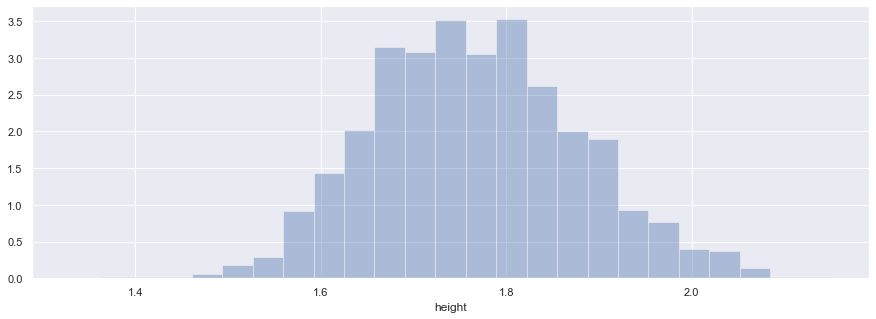

In [111]:
fig= plt.subplots(figsize=(15, 5))
sns.distplot(height_data, kde=False, bins=25, hist_kws={"density": True})
plt.show()

* Não, a distribuição parece ser normal mas segundo o teste Shapiro-Wilk ele rejeita H0.

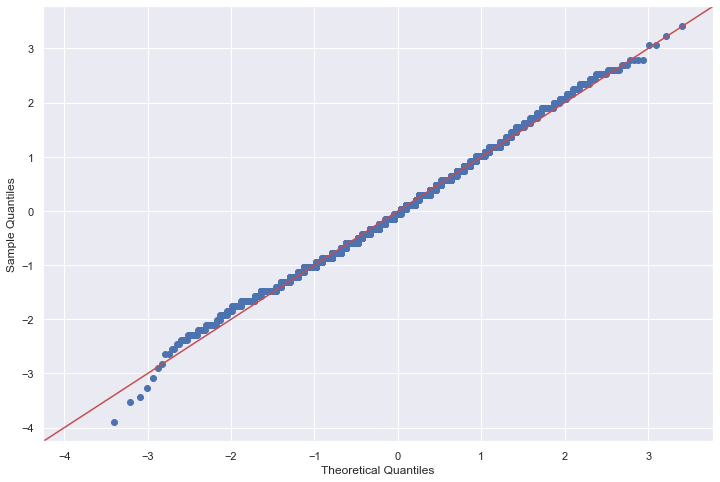

In [112]:
sm.qqplot(height_data, fit=True, line="45");

* Em vista do p para essa amostra ser muito baixa, a resposta é não.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [113]:
def q2():
    # Retorne aqui o resultado da questão 2.
    stat, p = sct.jarque_bera(height_data)
    print(f'Statistics={round(stat, 3)}, p={p}')
    if p> alpha:
        return True
    else:
        return False
q2()

Statistics=13.034, p=0.001478366424594868


False

__Para refletir__:

* Esse resultado faz sentido?

* Sim, esse resultado converge com o resultado da questão 1, no qual foi usado o teste Shapiro-Wilks, mostrando que a coluna 'height' do data frame não possui uma distribuição normal.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [114]:
def q3():
    # Retorne aqui o resultado da questão 3.
    stat, p = sct.normaltest(weight_data)
    print(f'Statistics={round(stat, 3)}, p={p}')
    if p> alpha:
        return True
    else:
        return False
q3()

Statistics=510.247, p=1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

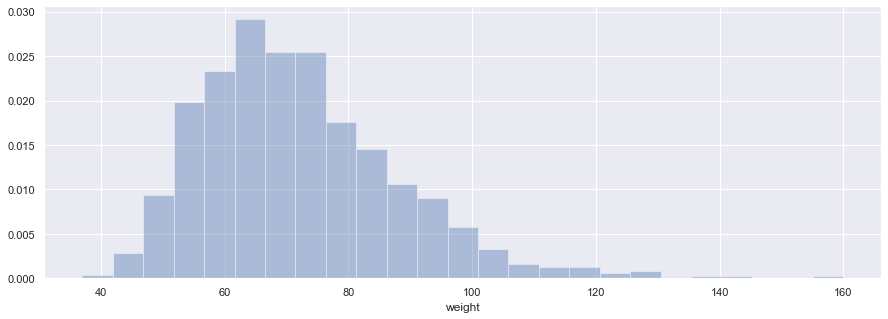

In [128]:
fig= plt.subplots(figsize=(15, 5))
sns.distplot(weight_data, kde=False, bins=25, hist_kws={"density": True})
plt.show()

* Sim, a forma do gráfico e o teste são condizentes pois pelo histograma é possível ver que os dados se desviam da distribuição normal. 

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [115]:
def q4():
    # Retorne aqui o resultado da questão 4.
    weight_log = np.log(weight_data)
    stat, p = sct.normaltest(weight_data)
    print(f'Statistics={round(stat, 3)}, p={p}')
    if p> alpha:
        return True
    else:
        return False
q4()

Statistics=510.247, p=1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

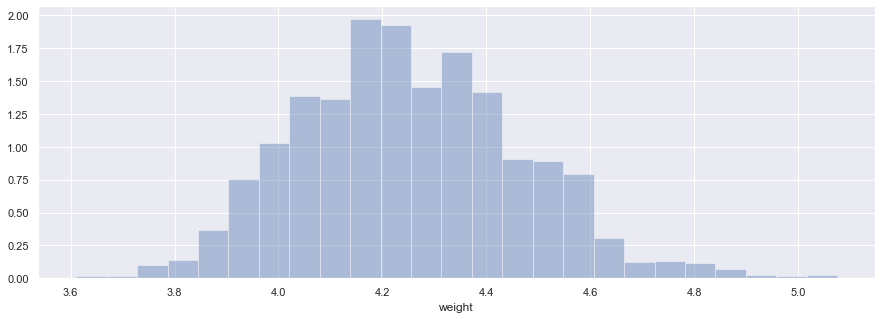

In [131]:
fig= plt.subplots(figsize=(15, 5))
weight_log = np.log(weight_data)
sns.distplot(weight_log, kde=False, bins=25, hist_kws={"density": True})
plt.show()

* Não, o gráfico se aproxima da distribuição normal.

* Sim, esperava não rejeitar H0 já que as transformações nos permitem usar os testes que se baseiam na normalidade das   distribuições de maneira mais eficiente. Provavelmente a transformação feita não foi a mais adequada.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [123]:
bra = df.loc[df['nationality'] == 'BRA'].height
usa = df.loc[df['nationality'] == 'USA'].height
can = df.loc[df['nationality'] == 'CAN'].height

In [134]:
def q5():
    # Retorne aqui o resultado da questão 5.
    stat, p = sct.ttest_ind(bra, usa, equal_var = False, nan_policy='omit')
    if p> alpha:
        return True
    else:
        return False
    
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [133]:
def q6():
    # Retorne aqui o resultado da questão 6.
    stat, p = sct.ttest_ind(bra, can, equal_var = False, nan_policy='omit')
    if p> alpha:
        return True
    else:
        return False
q6()

False

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [127]:
def q7():
    # Retorne aqui o resultado da questão 7.
    stat, p = sct.ttest_ind(usa, can, equal_var = False, nan_policy='omit')
    return round(p, 8).item()
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [132]:
print(f'mean_usa: {usa.mean()}, mean_canada: {can.mean()}')

mean_usa: 1.787767857142857, mean_canada: 1.75859375


* Não, pois provavelmente caímos em um erro do tipo 2, onde a H0 é visivelmente verdadeira, porém, a rejeitamos.

* De acordo com esse p-valor, rejeitamos H0.

* Bom, teria que avaliar o melhor teste a ser aplicado.